# 一、 数据集信息

## 1. 数据来源：Kaggle（ [Netflix Movies and TV Shows]( https://www.kaggle.com/datasets/shivamb/netflix-shows)）

## 2. 数据集内容

|文件名称|说明|包含特征|
|:---|:----|:---|
|netflix_titles.csv|Netflix电影数据|影片标题、类型、导演、演员、上线时间、用户评分等|

**字段说明**

|列名称|	说明|
|:---|:---|
|show_id|Unique ID for every Movie / Tv Show|
|type|Identifier - A Movie or TV Show|
|title|Title of the Movie / Tv Show|
|director|Director of the Movie|
|cast|Actors involved in the movie / show|
|country|Country where the movie / show was produced|
|data_added|Date it was added on Netflix|
|release_year|Actual Release year of the move / show|
|rating|TV Rating of the movie / show|
|duration|Total Duration - in minutes or number of seasons|
|listed_in|Genere|
|description|The summary description|

**其中：rating（内容分级）**

PG-13：家长需特别谨慎，部分内容可能不适合13岁以下儿童观看。

TV-MA：仅限成人观看（TV-Mature Audience），可能包含暴力、性内容或粗俗语言。

PG：建议家长指导（Parental Guidance Suggested），部分内容可能不适合儿童。

TV-14：可能不适合14岁以下儿童观看。

TV-PG：建议家长指导（Parental Guidance Suggested for children）。

TV-Y：适合所有儿童（2-6岁）。

TV-Y7：适合7岁及以上儿童。

R：限制级（Restricted），17岁以下需家长陪同观看。

TV-G：适合所有年龄段（General Audience）。

G：大众级（General Audiences），适合所有年龄段。

NC-17：17岁及以下不得观看（比R级更严格）。

NR：未评级（Not Rated）。

TV-Y7-FV：适合7岁及以上，可能包含幻想暴力（Fantasy Violence）。

UR：未评级（Unrated），通常用于未提交分级的电影。


# 二、 数据清洗

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 加载数据
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# 缺失值检查
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# 重复值检查
data.duplicated().sum()

0

In [6]:
# 异常值检测与处理

# 对于type列
valid_values = {'Movie', 'TV Show'}
invalid_mask = ~data['type'].isin(valid_values)
invalid_data = data[invalid_mask]
invalid_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [7]:
# 对于rating列
data['rating'].unique() #存在异常值
standard_ratings = {
    # 电影分级
    'G', 'PG', 'PG-13', 'R', 'NC-17',
    # 电视分级
    'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA',
    # 其他常见分级
    'NR', 'UR'  # 可根据需求决定是否保留
}

# 找出不在 standard_ratings 中的值
non_standard = ~data['rating'].isin(standard_ratings)
anomalies = data[non_standard]['rating'].unique()
print("异常值（非标准分级）:", anomalies)
print("缺失值数量:", data['rating'].isna().sum())

异常值（非标准分级）: ['74 min' '84 min' '66 min' nan]
缺失值数量: 4


In [8]:
#处理异常的分级rating
#移动到duration列
# 如果 'duration' 列有空值，可以用 rating 中的 "XX min" 填充
mask = data['rating'].str.contains('min', na=False)
data.loc[mask, 'duration'] = data.loc[mask, 'rating']
data.loc[mask, 'rating'] = np.nan  # 将 rating 设为 NaN

In [9]:
# 再次检查修改成功
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
# 时间格式转换
data['date_added']=pd.to_datetime(data['date_added'],errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8800 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [11]:
# 保存处理后的数据
data.to_csv("netflix_titles_v1.csv")

# 三、 探索性分析

## 1. 影片类型统计（listed_in)

In [18]:
# 拆分listed_in列并展开为多行
df = pd.DataFrame(data['listed_in'])
df = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')

#统计每个分类的出现次数
listed_in_counts = df["listed_in"].value_counts().reset_index()
listed_in_counts.columns = ["listed_in", "Count"]
listed_in_counts

,listed_in,Count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,LGBTQ Movies,1
71,TV Sci-Fi & Fantasy,1


## 2. 影片上线地区统计（country）

In [19]:
# 拆分listed_in列并展开为多行
cdf = pd.DataFrame(data['country'])
cdf = cdf.assign(country=cdf['country'].str.split(',')).explode('country')

#统计每个分类的出现次数
country_counts = cdf["country"].value_counts().reset_index()
country_counts.columns = ["country", "Count"]
country_counts

,country,Count
0,United States,3211
1,India,1008
2,United Kingdom,628
3,United States,479
4,Canada,271
...,...,...
192,Ecuador,1
193,Iran,1
194,Cyprus,1
195,Mongolia,1


# 四、 数据可视化

该数据可视化使用tableau实现。


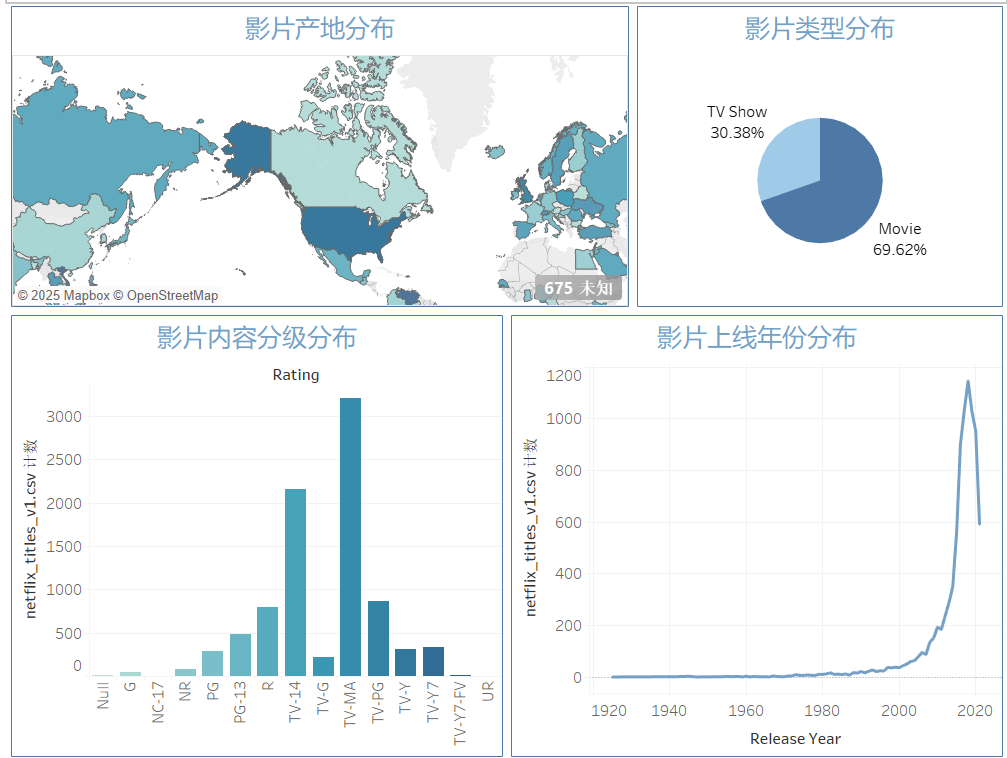

In [13]:
from IPython.display import Image
Image(filename="dashboard.png", width=800)

# 五、 分析结果

- 影片上映最多的地区是美国
- 上线电影数量大于电视剧数量
- 2018年影片上线数量最多
- 2018年以前影片上线数量逐年增加，2018年以后影片上线数量逐年减少